<br> </br>
<font color='darkred' size = 7.5> <center>  <b> Quantitative strategies on high-frequency data </b> </center> </font>
<font color='darkred' size = 5> <center>  1. Dealing with time series, data aggregation </center> </font>
<br>
<font size = 5> <center> prof. Piotr Wójcik </center> </font>
<br> 
<font size = 5> <center>  academic year 2025/2026 </center> </font>

In [2]:
# pip install yfinance

In [3]:
# lets load all needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf # for downloading data from Yahoo Finance
import numpy as np
import warnings
warnings.simplefilter(action = "ignore", category = UserWarning)  # ignore warnings

# Working with time series data

## Reading data from csv file

In [4]:
quotations_aapl = pd.read_csv("data/AAPL_daily.csv")

# print the first few rows
quotations_aapl.head()

,Date,Close,High,Low,Open,Volume
0,2005-01-03,0.951065,0.978414,0.940696,0.973455,691992000
1,2005-01-04,0.960833,0.983824,0.946256,0.958579,1096810400
2,2005-01-05,0.969248,0.980518,0.962485,0.968646,680433600
3,2005-01-06,0.969999,0.975409,0.951666,0.971802,705555200
4,2005-01-07,1.040626,1.046336,0.973004,0.976761,2227450400


In [5]:
# Lets see the structuer of the data and the Date column in particular
quotations_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5150 non-null   object 
 1   Close   5150 non-null   float64
 2   High    5150 non-null   float64
 3   Low     5150 non-null   float64
 4   Open    5150 non-null   float64
 5   Volume  5150 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 241.5+ KB


In [6]:
# we have to convert it into the datetime format
quotations_aapl['Date'] = pd.to_datetime(quotations_aapl['Date'])

In [7]:
# check the result
quotations_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5150 non-null   datetime64[ns]
 1   Close   5150 non-null   float64       
 2   High    5150 non-null   float64       
 3   Low     5150 non-null   float64       
 4   Open    5150 non-null   float64       
 5   Volume  5150 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 241.5 KB


In [8]:
# in addition it is useful to define the Date column as the index of the dataframe

quotations_aapl.set_index('Date', inplace = True)

In [9]:
# and check the result
quotations_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5150 entries, 2005-01-03 to 2025-06-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5150 non-null   float64
 1   High    5150 non-null   float64
 2   Low     5150 non-null   float64
 3   Open    5150 non-null   float64
 4   Volume  5150 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 241.4 KB


In [10]:
# now Date is not one of the data columns anymore, but indexes observations

quotations_aapl.head()

,Close,High,Low,Open,Volume
Date,,,,,
2005-01-03,0.951065,0.978414,0.940696,0.973455,691992000
2005-01-04,0.960833,0.983824,0.946256,0.958579,1096810400
2005-01-05,0.969248,0.980518,0.962485,0.968646,680433600
2005-01-06,0.969999,0.975409,0.951666,0.971802,705555200
2005-01-07,1.040626,1.046336,0.973004,0.976761,2227450400


In [11]:
print(quotations_aapl.index)

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12',
               '2025-06-13', '2025-06-16', '2025-06-17', '2025-06-18',
               '2025-06-20', '2025-06-23'],
              dtype='datetime64[ns]', name='Date', length=5150, freq=None)


## Getting daily data directly from Yahoo Finance

In [12]:
# Daily data can be downloaded directly from Yahoo Finance
# Let's load data for GE (General Electric) from 2005 to the present

quotations_ge = yf.download("GE", # symbol/ticker
                           start = "2005-01-01", # data początkowa
                           end = "2025-10-14") # data końcowa

# Check the data
quotations_ge.info()

/var/folders/rz/hb914cgn7wb_sxdhbbm8krnh0000gn/T/ipykernel_12467/2214213618.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  quotations_ge = yf.download("GE", # symbol/ticker
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5228 entries, 2005-01-03 to 2025-10-13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (Close, GE)   5228 non-null   float64
 1   (High, GE)    5228 non-null   float64
 2   (Low, GE)     5228 non-null   float64
 3   (Open, GE)    5228 non-null   float64
 4   (Volume, GE)  5228 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 245.1 KB


In [13]:
# data is automatically saved to a DataFrame
# indexed by the Date column

quotations_ge.head()

Price,Close,High,Low,Open,Volume
Ticker,GE,GE,GE,GE,GE
Date,,,,,
2005-01-03,105.324760,106.188313,104.892980,105.670180,4638370
2005-01-04,104.058243,106.073202,103.971890,105.353576,3932780
2005-01-05,103.424934,104.605128,103.424934,104.058207,3955628
2005-01-06,104.259705,104.835412,103.453727,103.712793,3992645
2005-01-07,103.626488,104.691542,103.194716,104.662755,3130766


In [14]:
# column names consist of price type and asset symbol (double names)

quotations_ge.columns

MultiIndex([( 'Close', 'GE'),
            (  'High', 'GE'),
            (   'Low', 'GE'),
            (  'Open', 'GE'),
            ('Volume', 'GE')],
           names=['Price', 'Ticker'])

In [16]:
# let's change the column names to make them more readable

quotations_ge.columns = [f"{price.lower()}_{ticker}" for price, ticker in quotations_ge.columns]

quotations_ge.head()

,close_GE,high_GE,low_GE,open_GE,volume_GE
Date,,,,,
2005-01-03,105.324760,106.188313,104.892980,105.670180,4638370
2005-01-04,104.058235,106.073194,103.971883,105.353568,3932780
2005-01-05,103.424988,104.605182,103.424988,104.058261,3955628
2005-01-06,104.259766,104.835474,103.453787,103.712854,3992645
2005-01-07,103.626419,104.691472,103.194648,104.662685,3130766


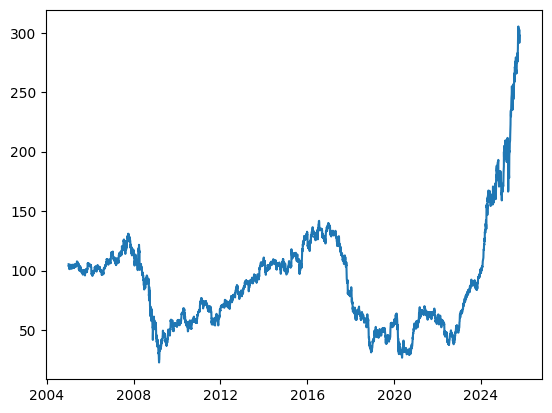

In [ ]:
# and make a plot of GE quotations

close_df = quotations_ge.xs("Close", level=0, axis=1)
plt.plot(close_df)

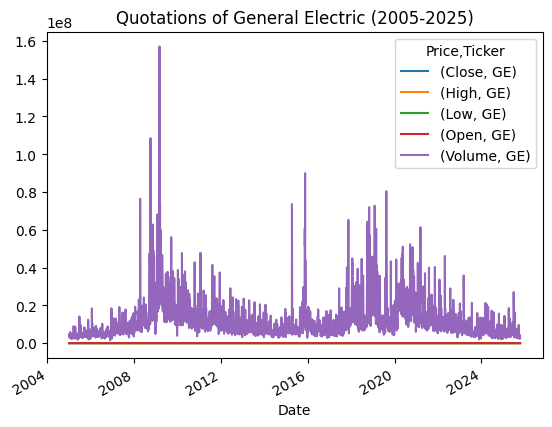

In [16]:
# and make a plot of GE quotations
quotations_ge.plot(title = "Quotations of General Electric (2005-2025)")
plt.show()

In [30]:
# By default, the chart is drawn for all columns.
# However, we can select only the ones we are interested in.

quotations_ge['close_GE'].plot(title = "Quotations of General Electric (2005-2025)")

plt.xlabel("Date")
plt.ylabel("Close price (USD)")
plt.grid()
plt.show()

KeyError: 'close_GE'

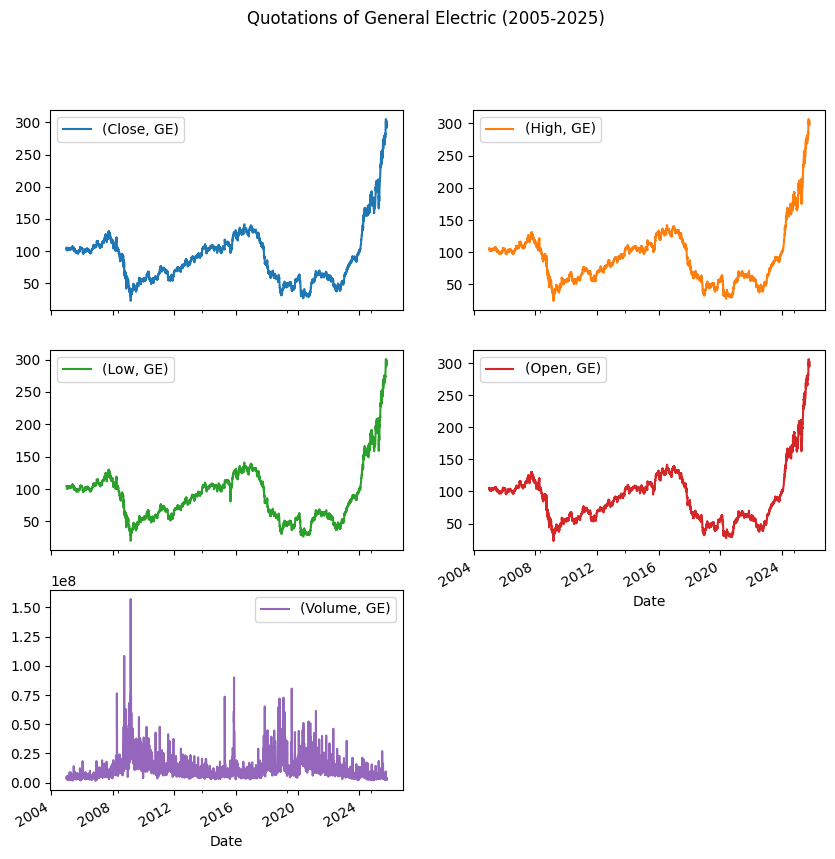

In [31]:
# Let's plot the figures for all columns
# using subplots

quotations_ge.plot(subplots = True,  
                  layout = (3, 2), 
                  title = "Quotations of General Electric (2005-2025)",
                  figsize = (10, 10))
plt.show()

## Working with data of higher frequency

Sample data from Dukascopy. The data was downloaded from the website: https://www.dukascopy.com/swiss/english/marketwatch/historical/ and saved as CSV files in the location provided below.

To access the data directly from Dukascopy one has to create a free Dukascopy account.

In [32]:
# XAUUSD (gold) - tick data for a single day

# downloaded from the Internet
XAUUSD_url = "http://coin.wne.uw.edu.pl/pwojcik/hfd/XAUUSD_Ticks_25.09.2023-25.09.2023.csv"

XAUUSD_ticks = pd.read_csv(XAUUSD_url)

XAUUSD_ticks.head()

# As you can see, the Local time column
# contains the time with millisecond precision

,Local time,Ask,Bid,AskVolume,BidVolume
0,25.09.2023 00:00:01.132 GMT+0200,1925.575,1924.335,450.0,450
1,25.09.2023 00:00:01.183 GMT+0200,1925.655,1924.365,450.0,450
2,25.09.2023 00:00:01.338 GMT+0200,1925.655,1924.385,450.0,450
3,25.09.2023 00:00:01.439 GMT+0200,1925.675,1924.385,450.0,450
4,25.09.2023 00:00:01.490 GMT+0200,1925.675,1924.365,450.0,450


In [ ]:
# Let's convert the first column to a datetime format

# first, we strip the time zone information from the end

XAUUSD_ticks['Local time'] = XAUUSD_ticks['Local time'].map(lambda x: x.split(' GMT')[0])

# we need to specify the format in which the datetime is stored:
# %y indicates a 2-digit year,
# %Y indicates a 4-digit year
# %m indicates a two-digit month number
# %d indicates a two-digit day number
# %H indicates an hour
# %M indicates a minute
# %S indicates a second
# %f indicates microseconds

# more information on date and time formats can be found here:
# https://docs.python.org/3/library/datetime.html

XAUUSD_ticks['Local time'] = pd.to_datetime(XAUUSD_ticks['Local time'], 
                                            # date and time format elements
                                            format = "%d.%m.%Y %H:%M:%S.%f", 
                                            utc = False)

In [34]:
XAUUSD_ticks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72277 entries, 0 to 72276
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Local time  72277 non-null  datetime64[ns]
 1   Ask         72277 non-null  float64       
 2   Bid         72277 non-null  float64       
 3   AskVolume   72277 non-null  float64       
 4   BidVolume   72277 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.8 MB


In [35]:
# the column Local time is then used to index the dataframe
XAUUSD_ticks.set_index('Local time', inplace = True)

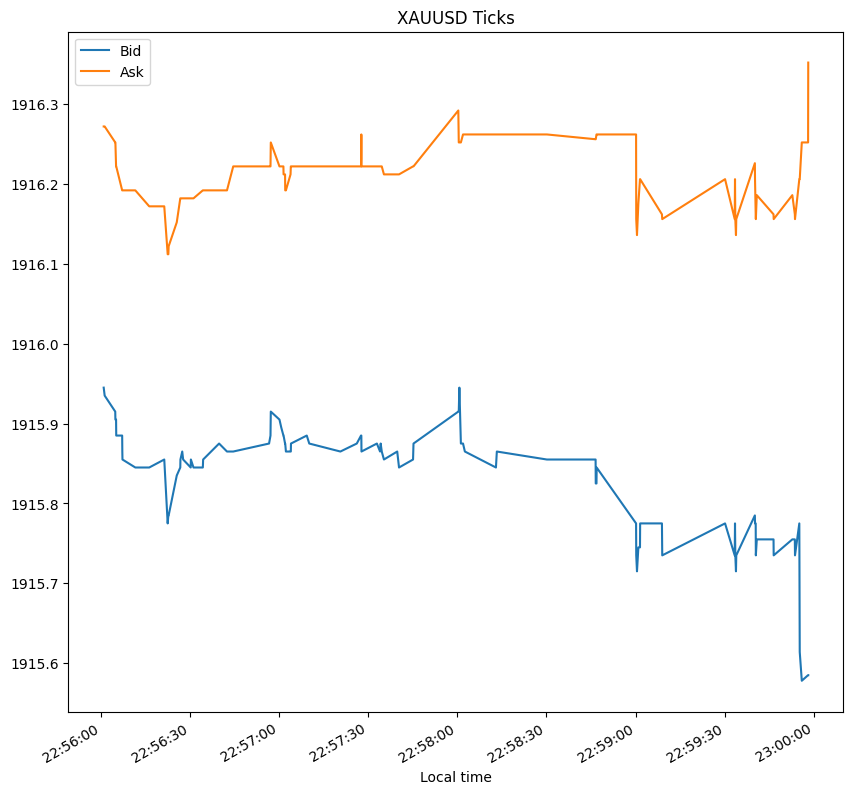

In [43]:
# Lets show Bid and Ask prices on the plot
XAUUSD_ticks[['Bid', 'Ask']][-100:].plot(subplots = False, layout = (4, 1), 
                                  title = "XAUUSD Ticks", figsize = (10, 10))
plt.show()

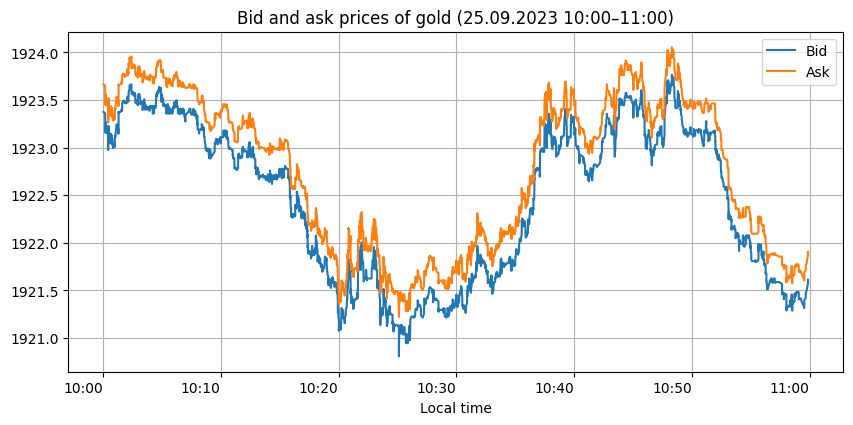

In [ ]:
# Let's see the Bid and Ask prices for one selected hour
# e.g. September 25, 2023, between 10:00 and 11:00 AM

ax = XAUUSD_ticks['2023-09-25 10:00:00':'2023-09-25 11:00:00'][['Bid', 'Ask']].plot(
    title="Bid and ask prices of gold (25.09.2023 10:00-11:00)",
    grid=True,
    figsize=(10, 5)
)

# Formatting of X axis: only hour and minute
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation = 0)

plt.show()

In [26]:
# lets add the column with the mid-price and bid-ask spread (in pips = 0.01 USD)

XAUUSD_ticks['mid_price'] = (XAUUSD_ticks['Bid'] + XAUUSD_ticks['Ask']) / 2
XAUUSD_ticks['bid_ask_spread'] = (XAUUSD_ticks['Ask'] - XAUUSD_ticks['Bid'])/0.01

<Axes: title={'center': 'Histogram of Bid-Ask Spread (in pips)'}, ylabel='Frequency'>

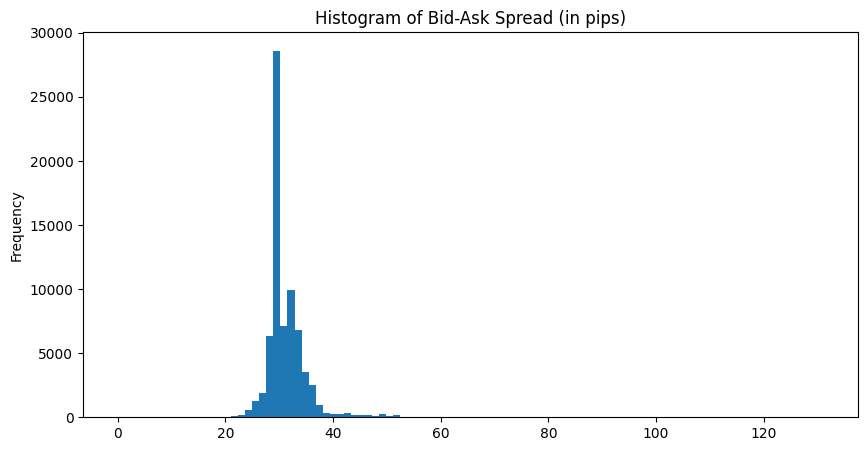

In [27]:
# and plot a histogram of the bid-ask spread
XAUUSD_ticks['bid_ask_spread'].plot(kind = 'hist', 
                                    bins = 100,
                                    title = "Histogram of Bid-Ask Spread (in pips)",
                                    figsize = (10, 5))

## Aggregation of data to lower frequency

In [ ]:
# let's aggregate tick data into hourly bars

# here we will use the resample function, which aggregates data
# according to the given frequency ('h' - hourly)

XAUUSD_hourly = XAUUSD_ticks.resample('h').agg({
    'Bid': 'last',
    'Ask': 'last',
    'BidVolume': 'meando',
    'AskVolume': 'mean'
})

XAUUSD_hourly.head()

,Bid,Ask,BidVolume,AskVolume
Local time,,,,
2023-09-25 00:00:00,1925.565,1926.055,262.416336,311.106069
2023-09-25 01:00:00,1924.665,1924.975,277.610881,189.384979
2023-09-25 02:00:00,1924.805,1925.095,148.576779,198.250401
2023-09-25 03:00:00,1923.635,1923.942,120.770767,164.832268
2023-09-25 04:00:00,1923.645,1924.032,120.000000,219.995428


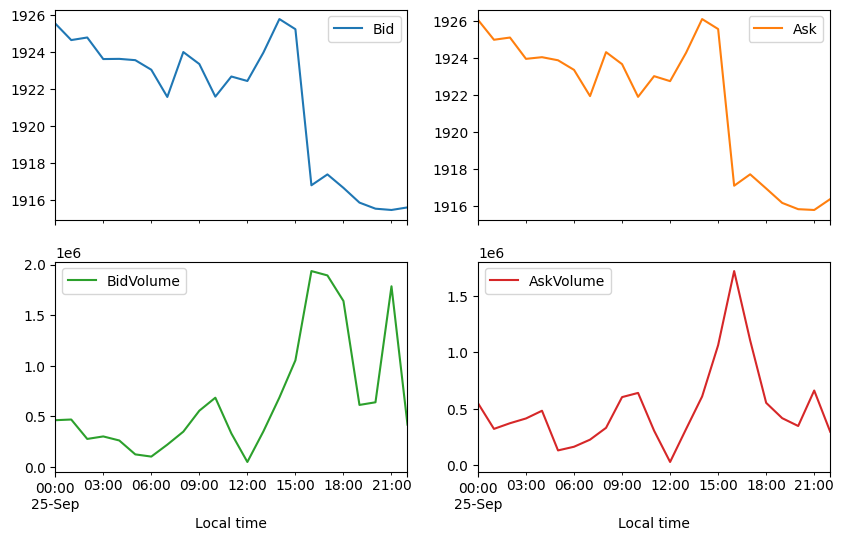

In [29]:
# Let's draw the Bid and Ask price charts in the hourly interval

XAUUSD_hourly.plot(subplots = True, 
                   layout = (2, 2),
                   figsize= (10, 6))
plt.show()

In [30]:
# based on tick data and mid-price
# let's create the OHLCV minute bars

XAUUSD_1min_OHLC = XAUUSD_ticks.resample('1min').agg(
    # we use so called Named Aggregation
    open = ('mid_price', 'first'),
    high = ('mid_price', 'max'),
    low = ('mid_price', 'min'),
    close = ('mid_price', 'last'),
    BidVolume = ('BidVolume', 'sum'),
    AskVolume = ('AskVolume', 'sum'),
    # number of ticks in a particular interval
    ticks = ('mid_price', 'count')
)

XAUUSD_1min_OHLC.head()

,open,high,low,close,BidVolume,AskVolume,ticks
Local time,,,,,,,
2023-09-25 00:00:00,1924.9550,1925.5900,1924.9550,1925.3600,21510,22860.0,53
2023-09-25 00:01:00,1925.4450,1925.6900,1925.2800,1925.6200,32380,33030.0,79
2023-09-25 00:02:00,1925.6720,1926.2100,1925.4700,1926.0785,18210,27670.0,65
2023-09-25 00:03:00,1926.0785,1926.4895,1925.8920,1926.4700,22660,24660.0,57
2023-09-25 00:04:00,1926.4600,1926.5630,1926.2495,1926.3200,18900,16560.0,42


# Exerises 1

# Exercise 1.1

Import daily quotes for three different companies (e.g., MSFT, KO, PEP, AMZN, INTL, or ^GSPC for the S&P 500) from Yahoo Finance.

Combine all closing prices into a single data frame and plot them on a single chart.

In [ ]:
# Exercise 1.1

tickers = ['MSFT', 'KO', 'PEP', 'AMZN', 'INTL', '^GSPC']
for t in tickers:
    globals() [f"d_{t}"] = yf.download(t,start = "2005-01-01", end = "2025-10-14") 
    


/var/folders/rz/hb914cgn7wb_sxdhbbm8krnh0000gn/T/ipykernel_12467/3661659934.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals() [f"d_{t}"] = yf.download(t,start = "2005-01-01", end = "2025-10-14")
[*********************100%***********************]  1 of 1 completed
/var/folders/rz/hb914cgn7wb_sxdhbbm8krnh0000gn/T/ipykernel_12467/3661659934.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals() [f"d_{t}"] = yf.download(t,start = "2005-01-01", end = "2025-10-14")
[*********************100%***********************]  1 of 1 completed
/var/folders/rz/hb914cgn7wb_sxdhbbm8krnh0000gn/T/ipykernel_12467/3661659934.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals() [f"d_{t}"] = yf.download(t,start = "2005-01-01", end = "2025-10-14")
[*********************100%***********************]  1 of 1 completed
/var/folders/rz/hb914cgn7wb_sxdhbbm8krnh0000gn/T/ipykernel_12467/36616

Price            Close        High         Low        Open     Volume
Ticker            MSFT        MSFT        MSFT        MSFT       MSFT
Date                                                                 
2005-01-03   18.454882   18.599816   18.392767   18.496291   65002900
2005-01-04   18.523901   18.703343   18.399672   18.544606  109442100
2005-01-05   18.482498   18.703349   18.468695   18.523907   72463500
2005-01-06   18.461784   18.675734   18.385866   18.530801   76890500
2005-01-07   18.406572   18.558407   18.372065   18.510096   68723300
...                ...         ...         ...         ...        ...
2025-10-07  523.979980  529.799988  521.440002  528.289978   14615200
2025-10-08  524.849976  526.950012  523.090027  523.280029   13363400
2025-10-09  522.400024  524.330017  517.400024  522.340027   18343600
2025-10-10  510.959991  523.580017  509.630005  519.640015   24133800
2025-10-13  514.049988  516.409973  511.679993  516.409973   14271600

[5228 rows x 5 colu

In [48]:
for t in tickers:
    print (globals()[f"d_{t}"])

Price            Close        High         Low        Open     Volume
Ticker            MSFT        MSFT        MSFT        MSFT       MSFT
Date                                                                 
2005-01-03   18.454882   18.599816   18.392767   18.496291   65002900
2005-01-04   18.523901   18.703343   18.399672   18.544606  109442100
2005-01-05   18.482498   18.703349   18.468695   18.523907   72463500
2005-01-06   18.461784   18.675734   18.385866   18.530801   76890500
2005-01-07   18.406572   18.558407   18.372065   18.510096   68723300
...                ...         ...         ...         ...        ...
2025-10-07  523.979980  529.799988  521.440002  528.289978   14615200
2025-10-08  524.849976  526.950012  523.090027  523.280029   13363400
2025-10-09  522.400024  524.330017  517.400024  522.340027   18343600
2025-10-10  510.959991  523.580017  509.630005  519.640015   24133800
2025-10-13  514.049988  516.409973  511.679993  516.409973   14271600

[5228 rows x 5 colu

In [53]:
for t in tickers:

    globals()[f"d_{t}"].columns = globals()[f"d_{t}"].columns.get_level_values(0)
    
print(d_AMZN)

Price            Close        High         Low        Open     Volume
Date                                                                 
2005-01-03    2.226000    2.272000    2.210500    2.247500  208930000
2005-01-04    2.107000    2.163000    2.075000    2.133500  388370000
2005-01-05    2.088500    2.138000    2.078000    2.078500  167084000
2005-01-06    2.052500    2.112500    2.045000    2.090500  174018000
2005-01-07    2.116000    2.134500    2.058000    2.069000  196732000
...                ...         ...         ...         ...        ...
2025-10-07  221.779999  222.889999  220.169998  220.880005   31194700
2025-10-08  225.220001  226.729996  221.190002  222.919998   46686000
2025-10-09  227.740005  228.210007  221.750000  225.000000   46412100
2025-10-10  216.369995  228.250000  216.000000  226.210007   72367500
2025-10-13  220.070007  220.679993  217.039993  217.699997   37744400

[5228 rows x 5 columns]


In [57]:
# Checking Index for date time
for t in tickers:
    print(globals()[f"d_{t}"].index)
    

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2025-09-30', '2025-10-01', '2025-10-02', '2025-10-03',
               '2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09',
               '2025-10-10', '2025-10-13'],
              dtype='datetime64[ns]', name='Date', length=5228, freq=None)
DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2025-09-30', '2025-10-01', '2025-10-02', '2025-10-03',
               '2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09',
               '2025-10-10', '2025-10-13'],
              dtype='datetime64[ns]', name='Date', length=5228, freq=None)
DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',

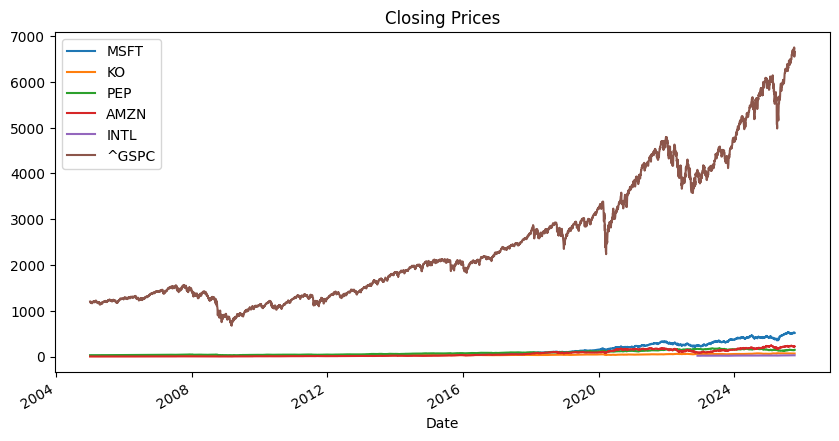

In [61]:


close_prices = pd.DataFrame()
for t in tickers:
    df = globals()[f"d_{t}"]
    close_prices[t] = df['Close']
    
close_prices.plot(figsize=(10, 5), title='Closing Prices')
plt.show()
    

# Exercise 1.2

* Import the EURGBP data from the file located at `"http://coin.wne.uw.edu.pl/pwojcik/hfd/EURGBP-2023-08.csv"
` (data was downloaded from https://www.truefx.com)
* NOTE! The file DOES NOT HAVE a row with column names - assign the following column names: symbol, date_time, bid, ask
* Create a valid datetime index
* Plot the selected columns on the chart

In [81]:

file_path = "http://coin.wne.uw.edu.pl/pwojcik/hfd/EURGBP-2023-08.csv"

data = pd.read_csv(file_path)

data.head()


,EUR/GBP,20230801 00:00:00.003,0.85695,0.85705
0,EUR/GBP,20230801 00:00:00.050,0.85695,0.85704
1,EUR/GBP,20230801 00:00:00.112,0.85696,0.85706
2,EUR/GBP,20230801 00:00:00.128,0.85695,0.85705
3,EUR/GBP,20230801 00:00:00.536,0.85696,0.85705
4,EUR/GBP,20230801 00:00:00.927,0.85695,0.85705


In [82]:
# place for solution to Exercise 1.3
data.columns = ['symbol', 'date_time', 'bid', 'ask']

In [84]:
data.index = pd.to_datetime(data['date_time'])

In [80]:
data.head(1000)

,symbol,bid,ask
0,EUR/GBP,0.85695,0.85704
1,EUR/GBP,0.85696,0.85706
2,EUR/GBP,0.85695,0.85705
3,EUR/GBP,0.85696,0.85705
4,EUR/GBP,0.85695,0.85705
...,...,...,...
995,EUR/GBP,0.85703,0.85712
996,EUR/GBP,0.85700,0.85712
997,EUR/GBP,0.85703,0.85712
998,EUR/GBP,0.85697,0.85716


# Exercise 1.3

Aggregate EURGBP data into intervals (bars) that cover the following time periods:
* 15 seconds,
* 3 minutes
* 2 hours


In [73]:
# we need to specify the format in which the datetime is stored:
# %y indicates a 2-digit year,
# %Y indicates a 4-digit year
# %m indicates a two-digit month number
# %d indicates a two-digit day number
# %H indicates an hour
# %M indicates a minute
# %S indicates a second
# %f indicates microseconds

In [85]:
df = data.copy()
df['date_time'] = pd.to_datetime(df['date_time'], 
                                            # date and time format elements
                                            format = "%Y%m%d %H:%M:%S.%f", 
                                            utc = False)

In [86]:
data.head(10)

,symbol,date_time,bid,ask
date_time,,,,
2023-08-01 00:00:00.050,EUR/GBP,20230801 00:00:00.050,0.85695,0.85704
2023-08-01 00:00:00.112,EUR/GBP,20230801 00:00:00.112,0.85696,0.85706
2023-08-01 00:00:00.128,EUR/GBP,20230801 00:00:00.128,0.85695,0.85705
2023-08-01 00:00:00.536,EUR/GBP,20230801 00:00:00.536,0.85696,0.85705
2023-08-01 00:00:00.927,EUR/GBP,20230801 00:00:00.927,0.85695,0.85705
2023-08-01 00:00:01.240,EUR/GBP,20230801 00:00:01.240,0.85696,0.85705
2023-08-01 00:00:01.490,EUR/GBP,20230801 00:00:01.490,0.85695,0.85705
2023-08-01 00:00:01.505,EUR/GBP,20230801 00:00:01.505,0.85697,0.85707
2023-08-01 00:00:01.536,EUR/GBP,20230801 00:00:01.536,0.85691,0.85712


In [87]:
data = data.drop(columns = 'date_time')
data.head(10)

,symbol,bid,ask
date_time,,,
2023-08-01 00:00:00.050,EUR/GBP,0.85695,0.85704
2023-08-01 00:00:00.112,EUR/GBP,0.85696,0.85706
2023-08-01 00:00:00.128,EUR/GBP,0.85695,0.85705
2023-08-01 00:00:00.536,EUR/GBP,0.85696,0.85705
2023-08-01 00:00:00.927,EUR/GBP,0.85695,0.85705
2023-08-01 00:00:01.240,EUR/GBP,0.85696,0.85705
2023-08-01 00:00:01.490,EUR/GBP,0.85695,0.85705
2023-08-01 00:00:01.505,EUR/GBP,0.85697,0.85707
2023-08-01 00:00:01.536,EUR/GBP,0.85691,0.85712


In [95]:

data_15s = data.resample('15s').agg({
    'symbol' : 'last',
    'bid' : 'last',
    'ask' : 'last'
  
})

In [94]:
data_15_min

,symbol,bid,ask
date_time,,,
2023-08-01 00:00:00,EUR/GBP,0.85699,0.85709
2023-08-01 00:15:00,EUR/GBP,0.85687,0.85697
2023-08-01 00:30:00,EUR/GBP,0.85677,0.85687
2023-08-01 00:45:00,EUR/GBP,0.85650,0.85663
2023-08-01 01:00:00,EUR/GBP,0.85654,0.85661
...,...,...,...
2023-08-31 22:45:00,EUR/GBP,0.85556,0.85572
2023-08-31 23:00:00,EUR/GBP,0.85555,0.85586
2023-08-31 23:15:00,EUR/GBP,0.85564,0.85575


In [97]:

data_3m = data.resample('3min').agg({
    'symbol' : 'last',
    'bid' : 'last',
    'ask' : 'last'
  
})

In [98]:

data_3h = data.resample('3h').agg({
    'symbol' : 'last',
    'bid' : 'last',
    'ask' : 'last'
  
})